In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use(r'U:\DNA-PAINT-SPT\nature_7pt.mplstyle')

# Load data [same data.hdf as Fig12]
data = pd.read_hdf(r'U:\DNA-PAINT-SPT\SI\Fig13\data.hdf')

Text(0.5, 0, 'T [s]')

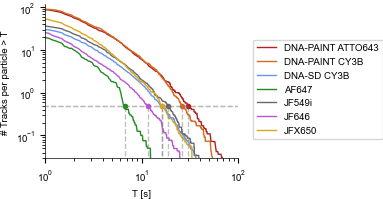

In [2]:
# Plot
f, ax = plt.subplots(1, 1)
f.set_figheight(2)
f.set_figwidth(2.5)
rolling = 60

colors = iter(['firebrick', 'chocolate', 'cornflowerblue',
              'forestgreen', 'dimgrey', 'mediumorchid', 'goldenrod'])

for condition in data.condition.unique():
    color = next(colors)
    data_expl = data.loc[data.condition == condition].explode(['NgT', 'Ts']).fillna(0)
    df_C_grouped_median = data_expl.groupby(by='Ts')['NgT'].median()
    Tcrit = data_expl.Tcrit.median()
    ax.loglog(df_C_grouped_median.index, df_C_grouped_median,
              '-', label=f'{condition}', color=color)
    ax.legend(bbox_to_anchor=(1.05, 0.8))
    ax.hlines(0.5, 0, 1000, color='grey', ls='--', zorder=100, alpha=0.1)
    ax.vlines(Tcrit, 0, 0.5, color='grey', ls='--', zorder=100, alpha=0.5)
    ax.scatter(Tcrit, 0.5, color=color, marker='o', zorder=100)

# Decorate Plot
ax.set_xlim(1, 100)
ax.set_ylim(0.03, 120)
ax.set_ylabel('# Tracks per particle > T ')
ax.set_xlabel('T [s]')